# Supervised Learning Exercise

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()

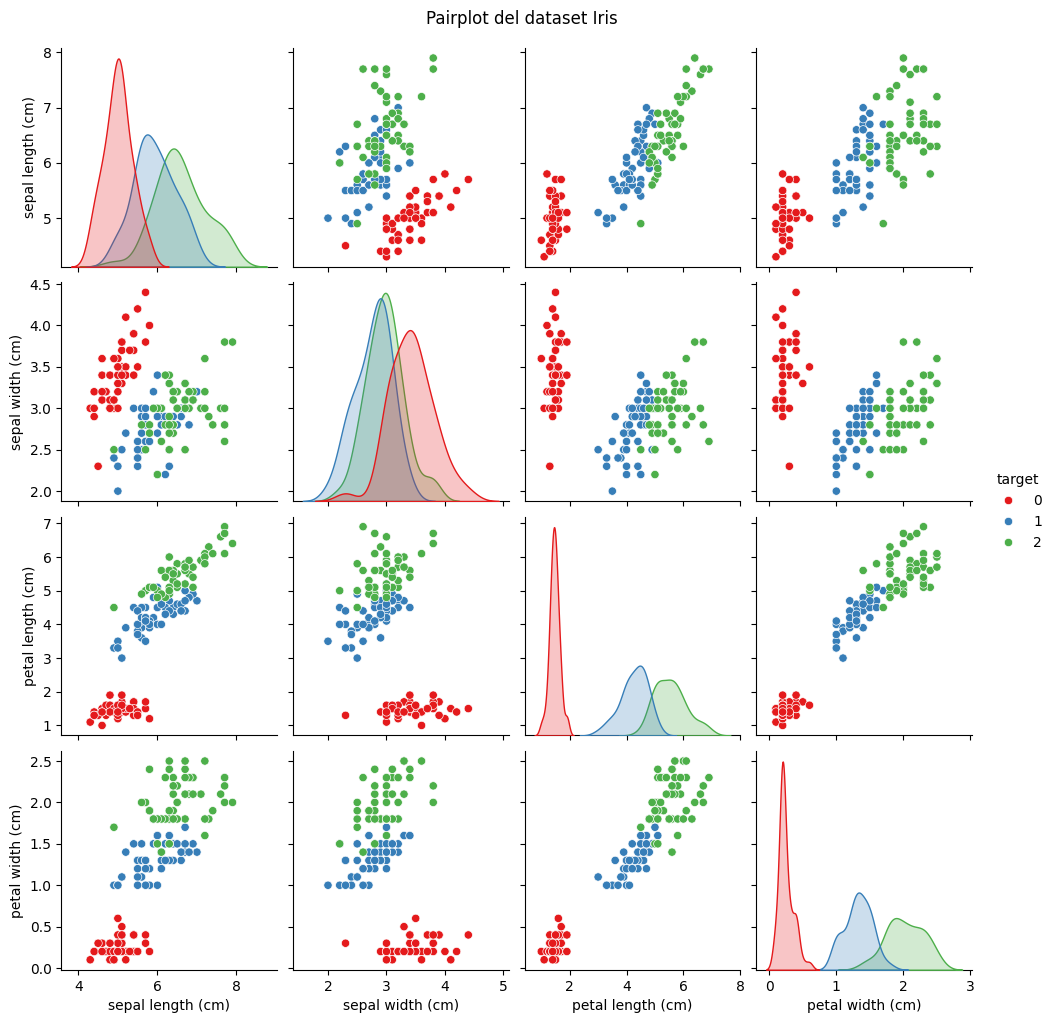

In [10]:
X = iris.data
y = iris.target

# Create a DataFrame of the data
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Visualize the data matrix
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle("Pairplot del dataset Iris", y=1.02)
plt.show()

Pairplot is a good plot to visualize the data when we have a reasonable number of variables. We can see that groups 1 and 2 are never fully separated. Nevertheless, the group 0, is distingly separated from the other groups. Thus, it's seems like a reasonable idea to apply a random forest algorithm.

In [29]:
groups = {0:0,1:0,2:0}
for i in y: groups[i]+=1
print("Groups: ", groups)

Groups:  {0: 50, 1: 50, 2: 50}


## Random Forest

Selecting a suitable evaluation metric for a Random Forest model is essential to achieve reliable and generalizable results. The choice depends on the task type (classification or regression) and the nature of your data.

### Metrics for Classification

For classification problems, several important metrics help measure model quality:

- **Precision (class $i$)**: The percentage of correct predictions for class $i$ divided by the total predictions made as class $i$:

$$
\text{Precision}_i = \frac{\text{TP}_i}{\text{TP}_i + \text{False Positive}_i}.
$$

Precision indicates how trustworthy the model is when it predicts class $i$.
- **Recall (class $i$)**: The percentage of true positives for class $i$ divided by the actual total in class $i$:

$$
\text{Recall}_i = \frac{\text{TP}_i}{\text{TP}_i+\text{False Negative}_i},
$$

where False Negative is the number of times that the objective was the class $i$ and the model predicted another output. Recall reflects the model's ability to find all members of class $i$. 

- **F1-score**: The harmonic mean of Precision and Recall, balancing both metrics and useful when classes are imbalanced:

$$
\text{F1}_i = 2 \cdot \frac{\text{Precision}_i \cdot \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i}
$$
- **Accuracy**: The ratio of correct predictions to the total number of predictions:

$$
\text{Accuracy} = \frac{\text{Total correct predictions}}{\text{Total predictions}}
$$

Since the prediction of Random Forests are the class more voted by the decisions trees, the evaluation metrics such as *log-loss* doesn't make sense for these models. We have seen that the iris data set is perfectly balanced, so use the `accuracy` may be enoff. Nevertheless, since we split the dataset randomly, we choose to use the `f1-score` in orther to balance the performance on predicting a class and finding the class.

### Key Parameters

-   **Number of estimators**: The number of trees in the forest. This parameter is very important, note that if we have a one number of estimators we have a decision tree. When we increase this number, often obtains higher precisions, but we loose interpretability and increase computational costs. In our case, since we have a small dataset I've choosen 10 trees instead of 100. 

-   **Criterion**: The function to mesure the quality of a split inside a tree. We can choose between different functions: *gini*, *entropy* or *log-loss*. 

-   **Max Depth**: Defines the maximum depth of the tree. This is a key parameter to avoid overfitting (deeper tree) or underfitting (shallow tree) zones. 

-   **Max Features**: The number of features to consider in a split. This parameter can take different types of values:
    *   `int` type: If we specify a number, in each split considers that number of variables in the split.
    *   `None`: Uses the maximum number of features; `max_features = n_features`.
    *   `sqrt` $\Rightarrow$ `max_features = sqrt(n_features)`
    *   `log2` $\Rightarrow$ `max_features = log2(n_features)`
In our case doesn't make a big difference.

-   **Max Leaf Nodes**: Define a limit on the number of leafs, to avoid complexity problems.
-   **Min Sample Split**: The minimum number of samples that have to be in a node to split it. If we work with big datasets, we can avoid computational problems by increasing this parameter. In our case, it's better to set it on 2 to gain performance in a small dataset.

In [61]:
rs = 222
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

#  Train 
# Play with different parameters values to achive better performances
clf = RandomForestClassifier(n_estimators=10,random_state=rs,criterion='entropy', max_features=3)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nEvaluation Metric Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9111111111111111

Evaluation Metric Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.77      0.91      0.83        11
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



These results make sense with the separation that we observed on the pairplot; where the group 0 was fully separated from 1 and 2. 